In [1]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import pypsa
import shutil
from rasterio.plot import show

import os
import sys
sys.path.append('../')  # to import helpers
from scripts._helpers import _sets_path_to_root
_sets_path_to_root("pypsa-africa")

This is the repository path:  c:\Users\Davide\Git\pypsa-africa
Had to go 1 folder(s) up.


<AxesSubplot:>

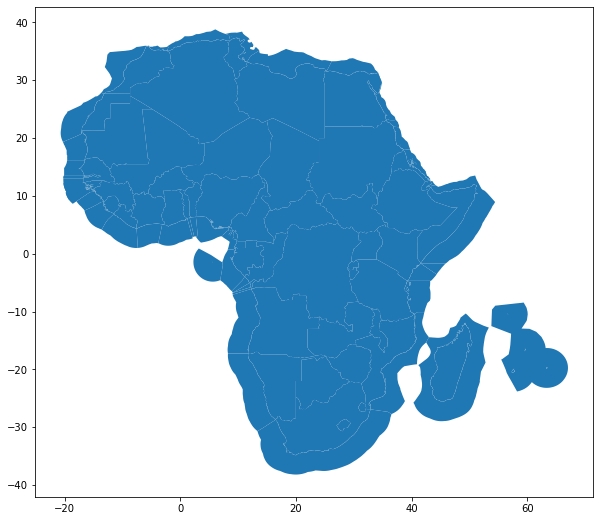

In [36]:
continent = gpd.read_file('resources/country_shapes.geojson')
off_shore = gpd.read_file('resources/offshore_shapes.geojson')
off_shore_old = gpd.read_file('resources/offshore_shapes_old.geojson')
gadm = gpd.read_file('resources/gadm_shapes.geojson')

ax = continent.plot(figsize=(10,10))
off_shore.plot(ax=ax)

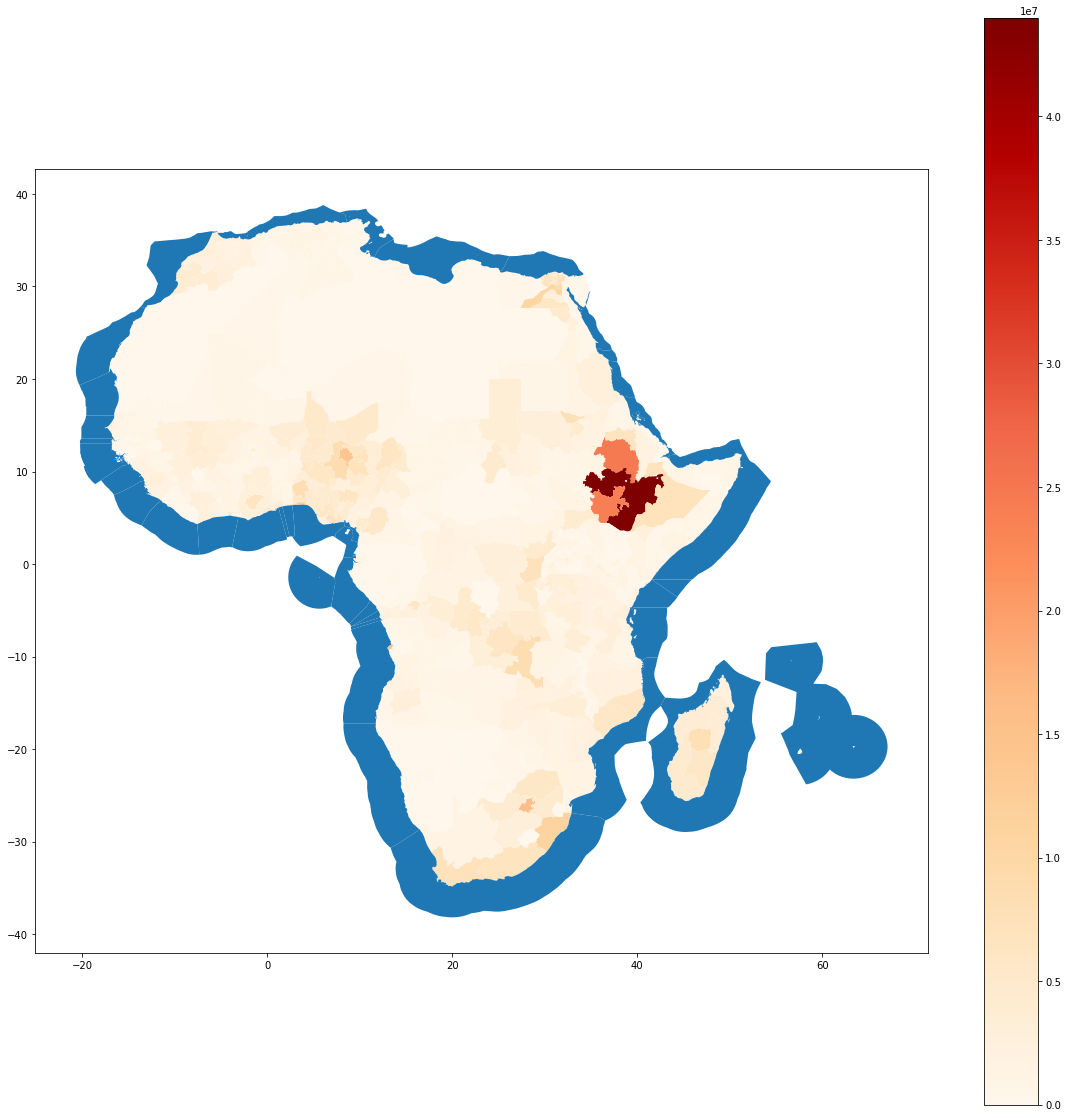

In [38]:
ax2= gadm.plot(column="pop", cmap='OrRd', figsize=(20, 20), legend=True)
off_shore.plot(ax=ax2, label="offshore")
# plt.savefig("gadm_pop.pdf")

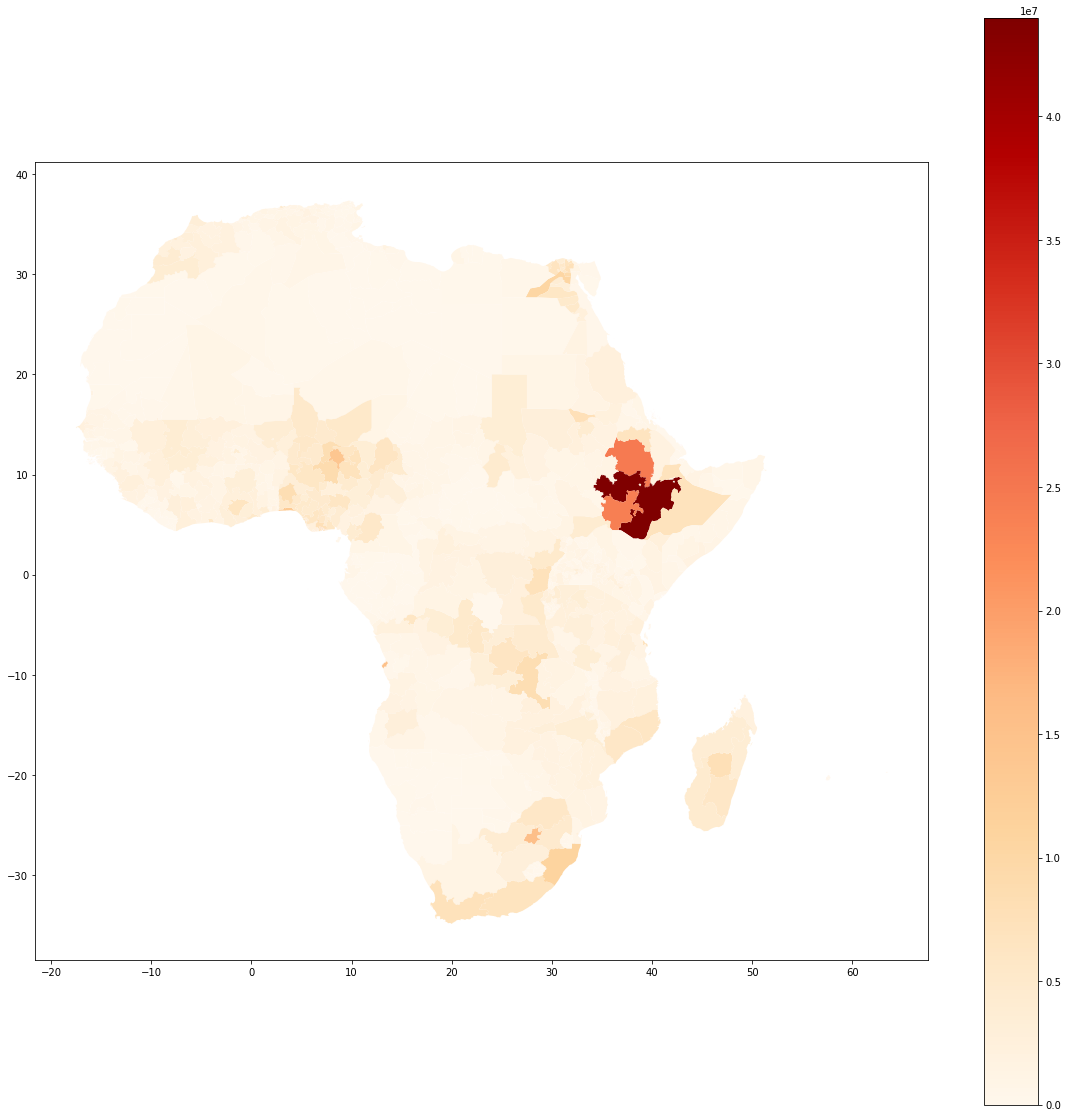

In [39]:
ax3= gadm.plot(column="pop", cmap='OrRd', figsize=(20, 20), legend=True)
off_shore.plot(ax=ax2, label="offshore")
# plt.savefig("gadm_gdp.pdf")

In [35]:
gadm[gadm["country"]=="KE"]

,GADM_ID,country,pop,gdp,geometry
318,KEN.1_1,KE,7.756523e+05,1.679452e+09,"POLYGON ((35.84734 -0.07654, 35.82207 -0.11243..."
319,KEN.2_1,KE,1.073746e+06,2.209688e+09,"POLYGON ((35.26193 -1.01562, 35.24075 -1.03093..."
320,KEN.3_1,KE,2.062140e+06,4.313464e+09,"POLYGON ((34.45476 0.47293, 34.38872 0.47563, ..."
321,KEN.4_1,KE,9.410409e+05,3.209494e+09,"POLYGON ((34.24632 0.31446, 34.23613 0.29631, ..."
322,KEN.5_1,KE,5.012387e+05,1.137823e+09,"POLYGON ((35.58806 0.17453, 35.56785 0.20298, ..."
323,KEN.6_1,KE,6.381259e+05,1.787284e+09,"POLYGON ((37.46395 -0.73364, 37.47382 -0.72407..."
324,KEN.7_1,KE,1.525806e+06,8.613858e+08,"POLYGON ((40.43329 -1.93512, 40.21291 -2.03973..."
325,KEN.8_1,KE,1.169692e+06,2.735929e+09,"POLYGON ((34.48337 -0.79247, 34.46432 -0.85891..."
326,KEN.9_1,KE,1.914950e+05,6.232438e+08,"POLYGON ((38.56964 -0.01509, 38.54852 -0.01971..."
327,KEN.10_1,KE,9.891349e+05,5.917967e+09,"POLYGON ((37.87513 -3.03994, 37.87073 -3.07751..."


In [32]:
gadm[gadm.country=="ET"].sum()

C:\Users\Davide\AppData\Local\Temp/ipykernel_21868/2774741259.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gadm[gadm.country=="KE"].sum()


GADM_ID    KEN.1_1KEN.2_1KEN.3_1KEN.4_1KEN.5_1KEN.6_1KEN....
country    KEKEKEKEKEKEKEKEKEKEKEKEKEKEKEKEKEKEKEKEKEKEKE...
pop                                           54045845.96875
gdp                                           193615169536.0
dtype: object